**Import Package and Library**

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import load_img
import matplotlib.image as mpimg
import numpy as np

**Import Dataset**

In [2]:
# Paths to training and validation datasets
train_dir = 'dataset/train'

for root, dirs, files in os.walk(train_dir):
    print(root, dirs, files)

dataset/train ['Apple - Fresh', 'Mango - Fresh', 'Orange - Fresh'] []
dataset/train\Apple - Fresh [] ['apple (1).jpeg', 'apple (10).jpeg', 'apple (100).jpeg', 'apple (101).jpeg', 'apple (102).jpeg', 'apple (103).jpeg', 'apple (104).jpeg', 'apple (105).jpeg', 'apple (106).jpeg', 'apple (107).jpeg', 'apple (108).jpeg', 'apple (109).jpeg', 'apple (11).jpeg', 'apple (110).jpeg', 'apple (111).jpeg', 'apple (112).jpeg', 'apple (113).jpeg', 'apple (114).jpeg', 'apple (115).jpeg', 'apple (116).jpeg', 'apple (117).jpeg', 'apple (118).jpeg', 'apple (119).jpeg', 'apple (12).jpeg', 'apple (120).jpeg', 'apple (121).jpeg', 'apple (122).jpeg', 'apple (123).jpeg', 'apple (124).jpeg', 'apple (125).jpeg', 'apple (126).jpeg', 'apple (127).jpeg', 'apple (128).jpeg', 'apple (129).jpeg', 'apple (13).jpeg', 'apple (130).jpeg', 'apple (131).jpeg', 'apple (132).jpeg', 'apple (133).jpeg', 'apple (134).jpeg', 'apple (135).jpeg', 'apple (136).jpeg', 'apple (137).jpeg', 'apple (138).jpeg', 'apple (139).jpeg', 'app

In [3]:
validation_dir = 'dataset/validation'

for root, dirs, files in os.walk(validation_dir):
    print(root, dirs, files)

dataset/validation ['Apple - Fresh', 'Mango - Fresh', 'Orange - Fresh'] []
dataset/validation\Apple - Fresh [] ['apple (1).jpeg', 'apple (10).jpeg', 'apple (11).jpeg', 'apple (12).jpeg', 'apple (13).jpeg', 'apple (14).jpeg', 'apple (15).jpeg', 'apple (16).jpeg', 'apple (17).jpeg', 'apple (18).jpeg', 'apple (19).jpeg', 'apple (2).jpeg', 'apple (20).jpeg', 'apple (21).jpeg', 'apple (22).jpeg', 'apple (23).jpeg', 'apple (24).jpeg', 'apple (25).jpeg', 'apple (26).jpeg', 'apple (27).jpeg', 'apple (28).jpeg', 'apple (29).jpeg', 'apple (3).jpeg', 'apple (30).jpeg', 'apple (31).jpeg', 'apple (32).jpeg', 'apple (33).jpeg', 'apple (34).jpeg', 'apple (35).jpeg', 'apple (36).jpeg', 'apple (37).jpeg', 'apple (38).jpeg', 'apple (39).jpeg', 'apple (4).jpeg', 'apple (40).jpeg', 'apple (41).jpeg', 'apple (42).jpeg', 'apple (43).jpeg', 'apple (44).jpeg', 'apple (45).jpeg', 'apple (46).jpeg', 'apple (47).jpeg', 'apple (48).jpeg', 'apple (49).jpeg', 'apple (5).jpeg', 'apple (50).jpeg', 'apple (51).jpeg', 

In [4]:
test_dir = 'dataset/test'

for root, dirs, files in os.walk(test_dir):
    print(root, dirs, files)

dataset/test [] ['apple (1).png', 'apple (2).png', 'apple (3).png', 'mango (1).jpeg', 'mango (2).jpeg', 'mango (3).jpeg', 'orange (1).png', 'orange (2).png', 'orange (3).png']


**Display Dataset**

In [5]:
def count_images_in_folder(folder_path):
    count_dict = {}

    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)

        if os.path.isdir(subfolder_path):
            num_files = len(os.listdir(subfolder_path))
            count_dict[subfolder] = num_files
    return count_dict

def print_image_counts(base_dir):
    for split in ['train', 'validation']:
        folder_path = os.path.join(base_dir, split)
        print(f"Menghitung gambar pada {split} folder:")
        count_dict = count_images_in_folder(folder_path)

        total_images = sum(count_dict.values())
        print(f"Jumlah gambar pada {split} folder: {total_images}")

        for subfolder, count in count_dict.items():
            print(f"  {subfolder}: {count} images")
        print()

base_dir = 'dataset'

print_image_counts(base_dir)

Menghitung gambar pada train folder:
Jumlah gambar pada train folder: 660
  Apple - Fresh: 220 images
  Mango - Fresh: 220 images
  Orange - Fresh: 220 images

Menghitung gambar pada validation folder:
Jumlah gambar pada validation folder: 200
  Apple - Fresh: 60 images
  Mango - Fresh: 70 images
  Orange - Fresh: 70 images



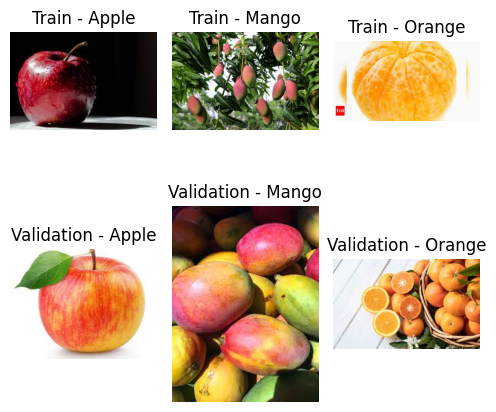

In [6]:
# Function to display a single image from each class
def show_sample_image(image_dir, class_name):
    image_files = os.listdir(image_dir)
    
    image_path = os.path.join(image_dir, image_files[0])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

# Displaying one image from each class
plt.figure(figsize=(5, 5))  

plt.subplot(2, 3, 1)
show_sample_image('dataset/train/Apple - Fresh', 'Train - Apple')

plt.subplot(2, 3, 2)
show_sample_image('dataset/train/Mango - Fresh', 'Train - Mango')

plt.subplot(2, 3, 3)
show_sample_image('dataset/train/Orange - Fresh', 'Train - Orange')

plt.subplot(2, 3, 4)
show_sample_image('dataset/validation/Apple - Fresh', 'Validation - Apple')

plt.subplot(2, 3, 5)
show_sample_image('dataset/validation/Mango - Fresh', 'Validation - Mango')

plt.subplot(2, 3, 6)
show_sample_image('dataset/validation/Orange - Fresh', 'Validation - Orange')

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


**Make Data Generator**

In [7]:
# data augmentation generator for the training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
train_ds = train_datagen.flow_from_directory(
    directory = train_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = 'categorical'
)

Found 660 images belonging to 3 classes.


In [9]:
validation_ds = val_datagen.flow_from_directory(
    directory = validation_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = 'categorical'
)

Found 200 images belonging to 3 classes.


In [10]:
x_batch, y_batch = next(train_ds)
print(x_batch.shape, y_batch.shape)

(32, 224, 224, 3) (32, 3)


**Use Pre-Trained Model MobileNetV2**

In [11]:

# Load the pre-trained EfficientNetB4 model without the top classification layer
MobileNetV2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3),
                              pooling='avg')

# Freeze the pre-trained base model layers
MobileNetV2_base.trainable = False

**Build Neural Network Model**

In [12]:
# Add new layers on top of the base model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = MobileNetV2_base(inputs, training=False)
x = BatchNormalization()(x)
x = Dropout(0.35)(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)

# Define the new model
model = Model(inputs, outputs)

In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,435,523 (9.29 MB)

 Trainable params: 174,979 (683.51 KB)

 Non-trainable params: 2,260,544 (8.62 MB)

**Compile Model**

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Train Model**

In [15]:
batch_size = 32

history= model.fit(
    train_ds,
    validation_data=validation_ds,
    steps_per_epoch=len(train_ds) // batch_size,
    epochs=35
)

Epoch 1/35


c:\Users\Daniswara Aditya P\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3605 - loss: 2.0891 - val_accuracy: 0.4300 - val_loss: 1.3344
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 909ms/step - accuracy: 0.4644 - loss: 1.3100 - val_accuracy: 0.5850 - val_loss: 0.9364
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 964ms/step - accuracy: 0.6103 - loss: 0.8376 - val_accuracy: 0.6600 - val_loss: 0.7401
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 930ms/step - accuracy: 0.7472 - loss: 0.6430 - val_accuracy: 0.7600 - val_loss: 0.6262
Epoch 5/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 908ms/step - accuracy: 0.7800 - loss: 0.5430 - val_accuracy: 0.8050 - val_loss: 0.5531
Epoch 6/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 940ms/step - accuracy: 0.7846 - loss: 0.5180 - val_accuracy: 0.8100 - val_loss: 0.5023
Epoch 7/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 921ms/step - accuracy: 0.7987 - loss: 0.4967 - val_accuracy: 0.8400 - val_loss: 0.4646
Epoch 8/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 894ms/step - accuracy: 0.8681 - loss: 0.3902 - val_accuracy: 0.8600 -

**Evaluate Model**

In [16]:
# evaluate the model
loss, model_accuracy = model.evaluate(validation_ds)

print(f'Model accuracy: {model_accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 519ms/step - accuracy: 0.9246 - loss: 0.2773
Model accuracy: 0.9350000023841858


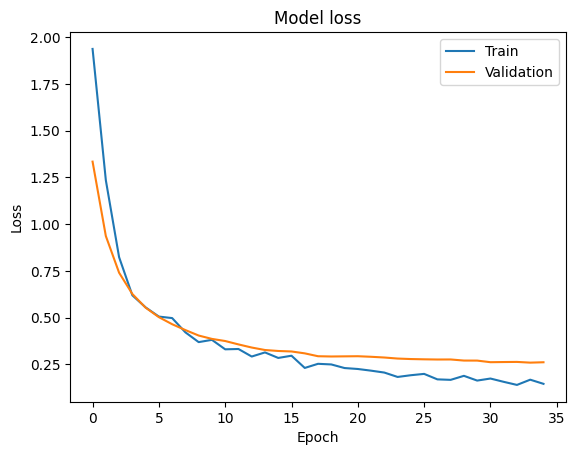

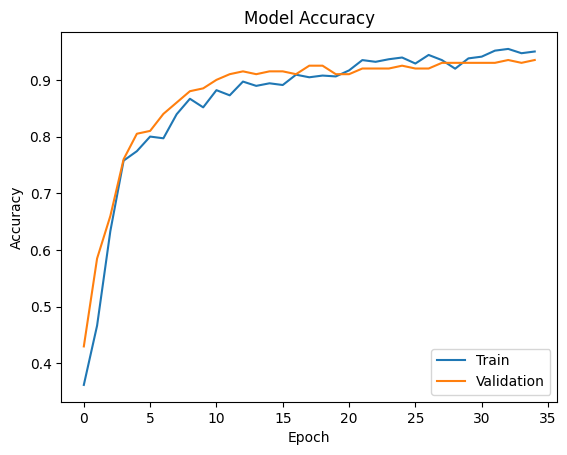

In [17]:
# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Save Model**

In [18]:
model.save('freshness-condition.h5')

**Testing**

In [19]:
#labels
class_names = list(train_ds.class_indices.keys())
print(class_names)

['Apple - Fresh', 'Mango - Fresh', 'Orange - Fresh']


In [20]:
# Tampilkan prediksi dan percentage
def predict_class(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    percentage = np.max(predictions)*100
    f_percentage = f"{percentage:.2f}%"
    return predicted_class, f_percentage

# Tampilkan gambar input bersamaan dengan hasil prediksi
def display_prediction(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predict_class(img_path)}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


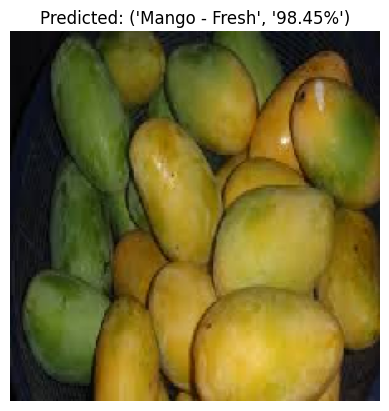

In [21]:
image_path = 'dataset/test/mango (3).jpeg'
display_prediction(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


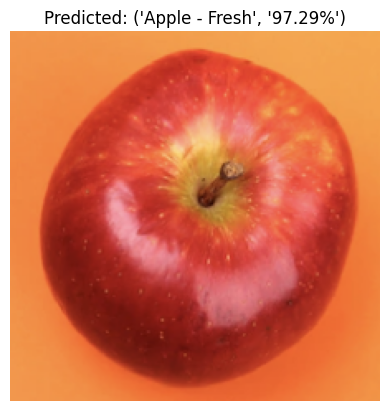

In [22]:
image_path = 'dataset/test/apple (2).png'
display_prediction(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


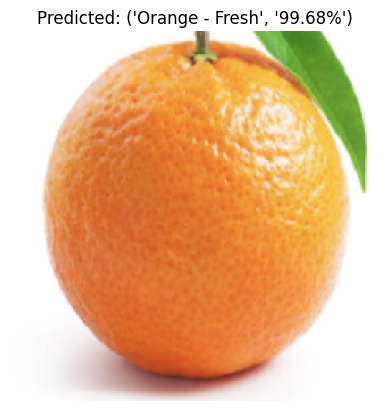

In [23]:
image_path = 'dataset/test/orange (2).png'
display_prediction(image_path)